# Exemplo de aplicação de PCA no dataset Breast Cancer

In [22]:
# Passo 1: Import de Bibliotecas
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [19]:
# Passo 2: Importar os Dados
breast_cancer_data = load_breast_cancer(as_frame=True)
df = breast_cancer_data.frame

In [20]:
# Passo 3: Visualizando os dados
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
# Passo 4: Quais a classes?
df['target'].unique()

array([0, 1])

Text(0, 0.5, 'mean texture')

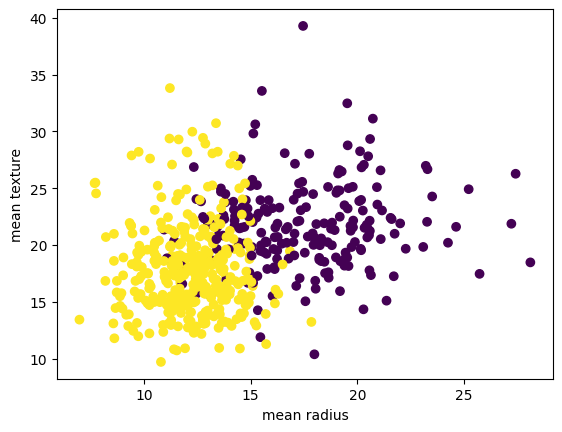

In [25]:
# Passo 5: Há muitas dimensões. Vamos escolher duas quaisquer para plotar 2D.
plt.scatter(df['mean radius'], df['mean texture'], c=df['target'])
plt.xlabel('mean radius')
plt.ylabel('mean texture')

# Aplicando PCA para Visualização

In [27]:
# Passo 1: Import de Bibliotecas
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [28]:
# Passo 2: Importanto o dataset em X e y
X, y = load_breast_cancer(as_frame=True, return_X_y=True)

In [29]:
# Passo 3: Humanos conseguem visualizar apenas 1D, 2D ou 3D, entao aplicamos PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X) # treinando o modelo e transformando os dados (30D -> 2D)

Text(0, 0.5, 'PC2')

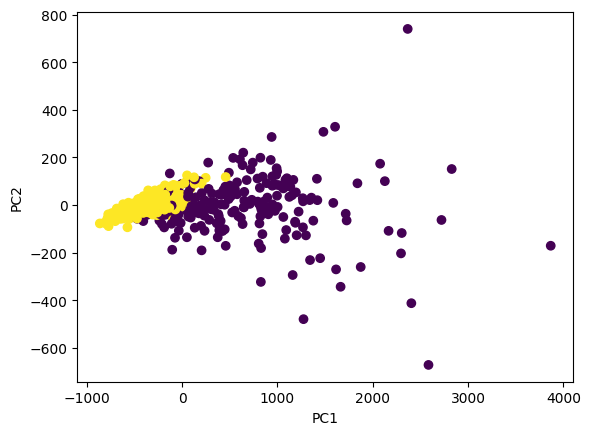

In [32]:
# Passo 4: Plotando as duas dimensões resultantes
plt.scatter(X_r[:, 0], X_r[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Aplicando PCA para acelerar a Classificação

In [33]:
# Passo 1: Import de Bibliotecas
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [34]:
# Passo 2: Importanto o dataset em X e y
X, y = load_breast_cancer(as_frame=True, return_X_y=True)

In [35]:
# Passo 3: A partir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Passo 4: Aplicar PCA nos dados de treino
pca = PCA(n_components=10)
X_r_treino = pca.fit(X).transform(X_train) # treinando o meu modelo e transformando os dados (30D -> 10D)

In [37]:
# Passo 5: PCA nos dados de teste
X_r_teste = pca.transform(X_test)

In [39]:
# Passo 6: Cria um modelo de RNA e o treina com os dados (X, y)
mlp = MLPClassifier()
mlp.fit(X_r_treino, y_train)

MLPClassifier()

In [40]:
# Passo 7: Verifica acurácia nos dados de treino
acc_treino = mlp.score(X_r_treino, y_train)*100
print(f'Acurácia no treino: {acc_treino:.2f}%')

Acurácia no treino: 97.14%


In [41]:
# Passo 8: Verifica acurácia nos dados de teste
acc_teste = mlp.score(X_r_teste, y_test)*100
print(f'Acurácia no teste: {acc_teste:.2f}%')

Acurácia no teste: 97.37%


# Aplicando a Classificação sem PCA

In [42]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

# importa os dados
X, y = load_breast_cancer(as_frame=True, return_X_y=True)

# partir o conjunto de dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=1)
# Usar random_state

# Cria um modelo de RNA e o treina com os dados (X, y)
mlp = MLPClassifier()
%time mlp.fit(X_treino, y_treino)

#Verifica acurácia nos dados de treino
acc_treino = mlp.score(X_treino, y_treino)*100
print(f'Acurácia no treino: {acc_treino:.2f}%')

#Verifica acurácia nos dados de teste
acc_teste = mlp.score(X_teste, y_teste)*100
print(f'Acurácia no teste: {acc_teste:.2f}%')

CPU times: user 570 ms, sys: 415 ms, total: 985 ms
Wall time: 528 ms
Acurácia no treino: 93.97%
Acurácia no teste: 94.15%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
